# Rohit Praveen Nair

# ML Lab 3

# A1

In [3]:
import pandas as pd
import numpy as np

file_path = "iris.csv"
df = pd.read_csv(file_path)

class1, class2 = "setosa", "versicolor"

features = df.columns[:-1]

class1_data = df[df["species"] == class1][features].values
class2_data = df[df["species"] == class2][features].values

centroid_c1 = np.mean(class1_data, axis=0)
centroid_c2 = np.mean(class2_data, axis=0)
sd_c1 = np.std(class1_data, axis=0)
sd_c2 = np.std(class2_data, axis=0)
euclidean_distance = np.linalg.norm(centroid_c1 - centroid_c2)

print(f"Centroid of Class {class1}:\n", centroid_c1)
print(f"Centroid of Class {class2}:\n", centroid_c2)
print(f"Standard Deviation of Class {class1}:\n", sd_c1)
print(f"Standard Deviation of Class {class2}:\n", sd_c2)
print(f"Euclidean Distance between Class {class1} and Class {class2}: {euclidean_distance}")

Centroid of Class setosa:
 [5.006 3.418 1.464 0.244]
Centroid of Class versicolor:
 [5.936 2.77  4.26  1.326]
Standard Deviation of Class setosa:
 [0.34894699 0.37719491 0.17176728 0.10613199]
Standard Deviation of Class versicolor:
 [0.51098337 0.31064449 0.46518813 0.19576517]
Euclidean Distance between Class setosa and Class versicolor: 3.2051745662288034


# A2

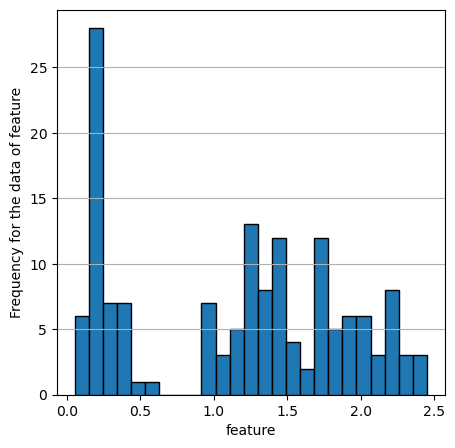

Mean for the observed feature: 1.1986666666666668
Variance for the observed feature: 0.5785315555555559


In [4]:
import matplotlib.pyplot as plt
feature_name = df.columns[3]
feature_data = df[feature_name].dropna()

hist_values, bin_edges = np.histogram(feature_data, bins=25)
plt.figure(figsize=(5, 5))
plt.bar(bin_edges[:-1], hist_values, width=np.diff(bin_edges), edgecolor='black')
plt.xlabel("feature")
plt.ylabel("Frequency for the data of feature")
plt.grid(axis="y")
plt.show()

mean_value = np.mean(feature_data)
variance_value = np.var(feature_data)

print(f"Mean for the observed feature: {mean_value}")
print(f"Variance for the observed feature: {variance_value}")

# A3

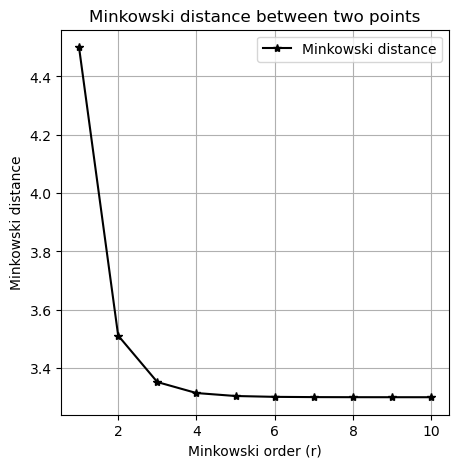

Minkowski distance (r=1): 4.5000
Minkowski distance (r=2): 3.5114
Minkowski distance (r=3): 3.3521
Minkowski distance (r=4): 3.3143
Minkowski distance (r=5): 3.3042
Minkowski distance (r=6): 3.3013
Minkowski distance (r=7): 3.3004
Minkowski distance (r=8): 3.3001
Minkowski distance (r=9): 3.3000
Minkowski distance (r=10): 3.3000


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "iris.csv"
df = pd.read_csv(file_path)

x_values = df[df.columns[3]].values  # petal_width
y_values = df[df.columns[2]].values  # petal_length

# Combine x and y into points
points = np.column_stack((x_values, y_values))

def minkowski_distance(x, y, r):
    return np.sum(np.abs(x - y) ** r) ** (1 / r)

# Select two distinct points for comparison (e.g., first row and 51st row)
point1 = points[0]   # First row (setosa)
point2 = points[50]  # 51st row (versicolor)

# Calculate Minkowski distances for r from 1 to 10
r_values = np.arange(1, 11)
distances = np.array([minkowski_distance(point1, point2, r) for r in r_values])


plt.figure(figsize=(5, 5))
plt.plot(r_values, distances, marker='*', linestyle='-', color='black', label="Minkowski distance")
plt.xlabel("Minkowski order (r)")
plt.ylabel("Minkowski distance")
plt.title(f"Minkowski distance between two points")
plt.grid(True)
plt.legend()
plt.show()

for r, d in zip(r_values, distances):
    print(f"Minkowski distance (r={r}): {d:.4f}")

# A4, A5, A6, A7

In [17]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = "iris.csv"
df = pd.read_csv(file_path)

# Filter the dataset for two classes (e.g., setosa and versicolor)
df = df[df["species"].isin(["virginica", "versicolor"])]

# Extract features (all columns except the last one) and labels
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Labels (species)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the sizes of the training and test sets
print(f"Training Set Size: {X_train.shape[0]} samples")
print(f"Test Set Size: {X_test.shape[0]} samples")

# Initialize the KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = knn.score(X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")

# Make predictions on the test set
predictions = knn.predict(X_test)
print("Predictions:", predictions)


Training Set Size: 70 samples
Test Set Size: 30 samples
Accuracy: 0.8333
Predictions: ['versicolor' 'virginica' 'virginica' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'virginica' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'virginica' 'virginica' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'versicolor' 'versicolor' 'versicolor' 'virginica'
 'versicolor' 'versicolor' 'virginica' 'versicolor' 'virginica']


# A8

k = 1, Accuracy = 0.87
k = 2, Accuracy = 0.83
k = 3, Accuracy = 0.83
k = 4, Accuracy = 0.80
k = 5, Accuracy = 0.83
k = 6, Accuracy = 0.83
k = 7, Accuracy = 0.87
k = 8, Accuracy = 0.83
k = 9, Accuracy = 0.87
k = 10, Accuracy = 0.83
k = 11, Accuracy = 0.90


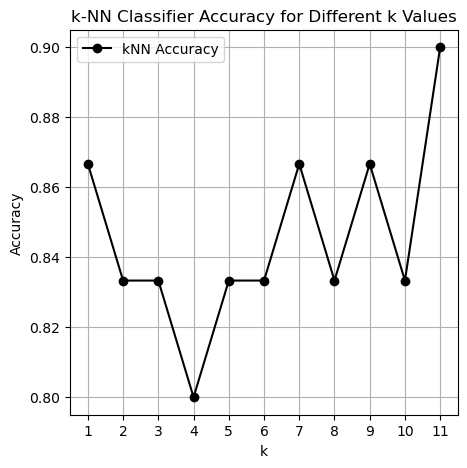

Accuracy for k=1: 0.87
Accuracy for k=3: 0.83


In [15]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


file_path = "iris.csv"
df = pd.read_csv(file_path)

# Filter the dataset for two less separable classes (e.g., versicolor and virginica)
df = df[df["species"].isin(["versicolor", "virginica"])]

# Extract features (all columns except the last one) and labels
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Labels (species)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define k values to test
k_values = range(1, 12)
accuracies = []

# Iterate over k values and calculate accuracy
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k = {k}, Accuracy = {acc:.2f}")


plt.figure(figsize=(5, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='black', label='kNN Accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("k-NN Classifier Accuracy for Different k Values")
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

# Print accuracy for k=1 and k=3
print(f"Accuracy for k=1: {accuracies[0]:.2f}")
print(f"Accuracy for k=3: {accuracies[2]:.2f}")

# A9

In [20]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

file_path = "iris.csv"
df = pd.read_csv(file_path)

# Use "virginica" and "versicolor" 
class1, class2 = "versicolor", "virginica"
df = df[df["species"].isin([class1, class2])]

# Extract features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)


train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Classification reports (for virginica and versicolor)
train_report = classification_report(y_train, y_train_pred, target_names=[class1, class2], output_dict=True)
test_report = classification_report(y_test, y_test_pred, target_names=[class1, class2], output_dict=True)

# Convert reports to DataFrame for cleaner output
train_df = pd.DataFrame(train_report).T.iloc[:-3, :-1]
test_df = pd.DataFrame(test_report).T.iloc[:-3, :-1]

print("\nConfusion Matrix for Training Data:\n", train_cm)
print("\nConfusion Matrix for Test Data:\n", test_cm)

print("\nPerformance Matrix for Training Data:")
print(train_df.to_string(float_format="%.2f"))

print("\nPerformance Matrix for Test Data:")
print(test_df.to_string(float_format="%.2f"))


Confusion Matrix for Training Data:
 [[33  0]
 [ 1 36]]

Confusion Matrix for Test Data:
 [[16  1]
 [ 4  9]]

Performance Matrix for Training Data:
            precision  recall  f1-score
versicolor       0.97    1.00      0.99
virginica        1.00    0.97      0.99

Performance Matrix for Test Data:
            precision  recall  f1-score
versicolor       0.80    0.94      0.86
virginica        0.90    0.69      0.78
